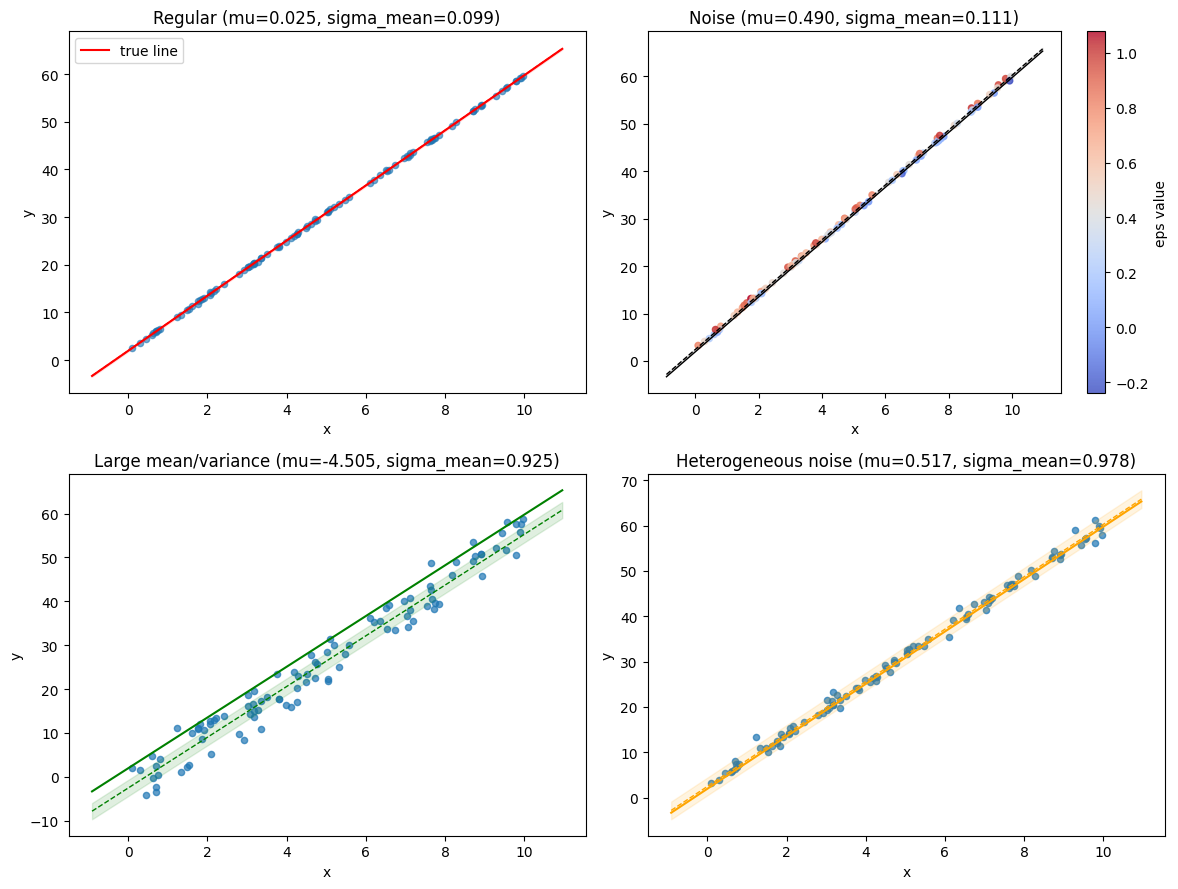

In [11]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
x = np.random.uniform(low=0, high=10, size=n)

# make a and b scalars (use single random linear model)
a = np.random.uniform(low=0, high=10)
b = np.random.uniform(low=0, high=10)

x_line = np.linspace(x.min() - 1, x.max() + 1, 200)
y_line = a * x_line + b


mu1 = np.random.uniform(low=0, high=0.05, size=n)
sigma_1 = np.random.uniform(low=0, high=0.2, size=n)

mu2 = np.random.uniform(low=0, high=1, size=n)
sigma_2 = np.random.uniform(low=0, high=0.2, size=n)

mu3 = np.random.uniform(low=-10, high=0.05, size=n)
sigma_3 = np.random.uniform(low=0, high=2, size=n)

mu4 = np.random.uniform(low=0, high=1, size=n)
sigma_4 = np.random.uniform(low=0, high=2, size=n)

eps1 = np.random.normal(loc=mu1, scale=sigma_1, size=n)
eps2 = np.random.normal(loc=mu2, scale=sigma_2, size=n)
eps3 = np.random.normal(loc=mu3, scale=sigma_3, size=n)
eps4 = np.random.normal(loc=mu4, scale=sigma_4, size=n)

# observations
y1 = a * x + b + eps1
y2 = a * x + b + eps2
y3 = a * x + b + eps3
y4 = a * x + b + eps4

# compute summary statistics of the mu and sigma arrays to visualize their effect
mu1_m, s1_m = mu1.mean(), sigma_1.mean()
mu2_m, s2_m = mu2.mean(), sigma_2.mean()
mu3_m, s3_m = mu3.mean(), sigma_3.mean()
mu4_m, s4_m = mu4.mean(), sigma_4.mean()

fig, axes = plt.subplots(2, 2, figsize=(12, 9))

# subplot 1: regular noise (uses mu1, sigma_1)
ax = axes[0, 0]
ax.scatter(x, y1, alpha=0.6, s=20)
ax.plot(x_line, y_line, color='red', lw=1.5, label='true line')
# annotate mean noise and band
ax.plot(x_line, y_line + mu1_m, color='red', ls='--', lw=1)
ax.fill_between(x_line, y_line + mu1_m - 2*s1_m, y_line + mu1_m + 2*s1_m, color='red', alpha=0.1)
ax.set_title(f'Regular (mu={mu1_m:.3f}, sigma_mean={s1_m:.3f})')
ax.legend()
ax.set_xlabel('x')
ax.set_ylabel('y')

# subplot 2: noise with larger mean / different scale (uses mu2, sigma_2)
ax = axes[0, 1]
sc = ax.scatter(x, y2, c=eps2, cmap='coolwarm', alpha=0.8, s=20)
ax.plot(x_line, y_line, color='black', lw=1)
ax.plot(x_line, y_line + mu2_m, color='black', ls='--', lw=1)
ax.fill_between(x_line, y_line + mu2_m - 2*s2_m, y_line + mu2_m + 2*s2_m, color='black', alpha=0.08)
ax.set_title(f'Noise (mu={mu2_m:.3f}, sigma_mean={s2_m:.3f})')
fig.colorbar(sc, ax=ax, label='eps value')
ax.set_xlabel('x')
ax.set_ylabel('y')

# subplot 3: large (possibly negative) mean and larger sigma (uses mu3, sigma_3)
ax = axes[1, 0]
ax.scatter(x, y3, alpha=0.7, s=20)
ax.plot(x_line, y_line, color='green', lw=1.5)
ax.plot(x_line, y_line + mu3_m, color='green', ls='--', lw=1)
ax.fill_between(x_line, y_line + mu3_m - 2*s3_m, y_line + mu3_m + 2*s3_m, color='green', alpha=0.12)
ax.set_title(f'Large mean/variance (mu={mu3_m:.3f}, sigma_mean={s3_m:.3f})')
ax.set_xlabel('x')
ax.set_ylabel('y')

# subplot 4: heterogeneous noise (uses mu4, sigma_4)
ax = axes[1, 1]
ax.scatter(x, y4, alpha=0.7, s=20)
ax.plot(x_line, y_line, color='orange', lw=1.5)
ax.plot(x_line, y_line + mu4_m, color='orange', ls='--', lw=1)
ax.fill_between(x_line, y_line + mu4_m - 2*s4_m, y_line + mu4_m + 2*s4_m, color='orange', alpha=0.12)
ax.set_title(f'Heterogeneous noise (mu={mu4_m:.3f}, sigma_mean={s4_m:.3f})')
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.tight_layout()
plt.show()